<a href="https://colab.research.google.com/github/Tej1109/MLP_Pracs/blob/main/Tejas_MLP_Prac7_Classification_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Matplot config

In [2]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='rainbow')
    plt.title(title)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')


In [3]:
def train_plot_confusion(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(model, np.vstack((X_train, X_test)),
                           np.hstack((y_train, y_test)),
                           f"{model_name}\nAccuracy: {acc:.2f}")

    # Confusion matrix
    y_pred = model.predict(X_test)
    print(y_pred)
    cm = confusion_matrix(y_test, y_pred,labels = [0,1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=iris.target_names)
    print(f"\nConfusion Matrix for {model_name}:")
    disp.plot(cmap='Blues', colorbar=False)
    plt.show()

In [4]:
iris = load_iris()
X = iris.data[:, [0, 1]]  #Taking only sepal length and width for better vizualization of decision boundary
#Another reason for this is that petal length and width makes data linearly separable giving 100% accuracy in every model
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]

Confusion Matrix for Logistic Regression:


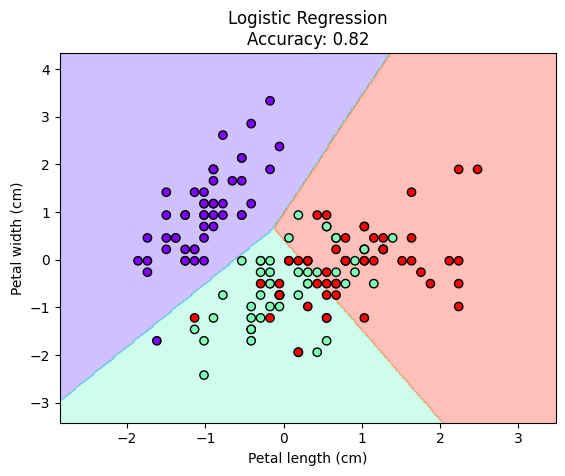

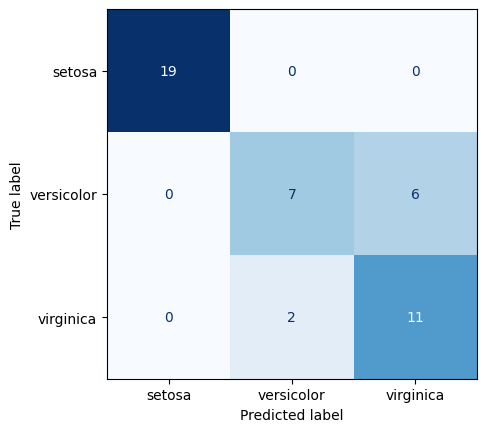

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
train_plot_confusion(model, "Logistic Regression", X_train, y_train, X_test, y_test)


[1 0 2 1 2 0 1 2 1 1 2 0 1 0 0 2 2 1 1 2 0 1 0 2 2 2 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 1 2 0 0]

Confusion Matrix for Decision Tree:


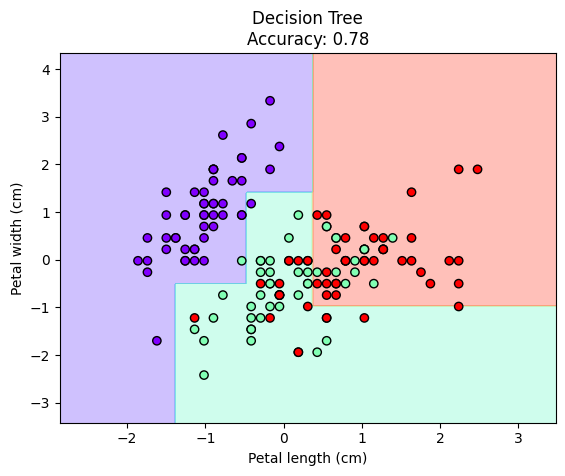

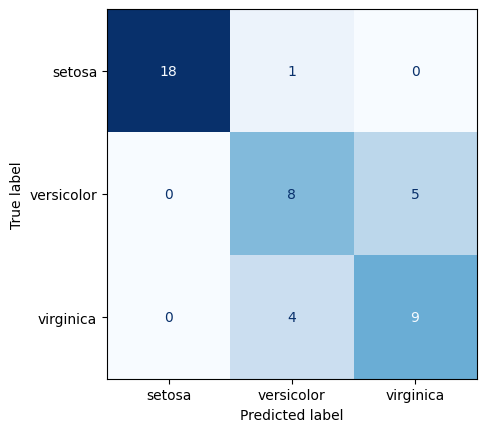

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
train_plot_confusion(model, "Decision Tree", X_train, y_train, X_test, y_test)


[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]

Confusion Matrix for Random Forest:


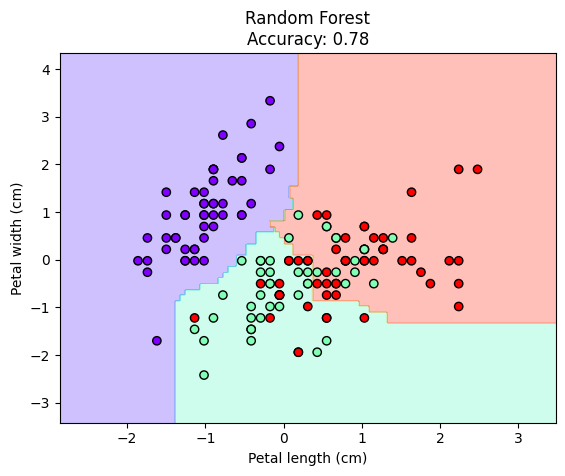

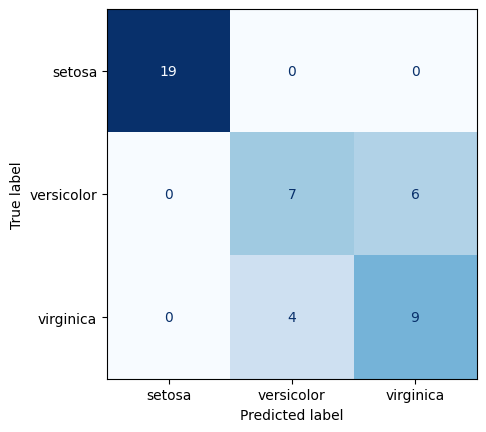

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
train_plot_confusion(model, "Random Forest", X_train, y_train, X_test, y_test)


[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]

Confusion Matrix for SVM (RBF Kernel):


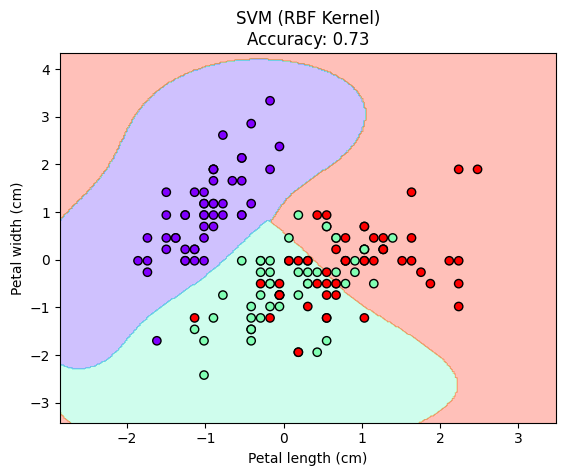

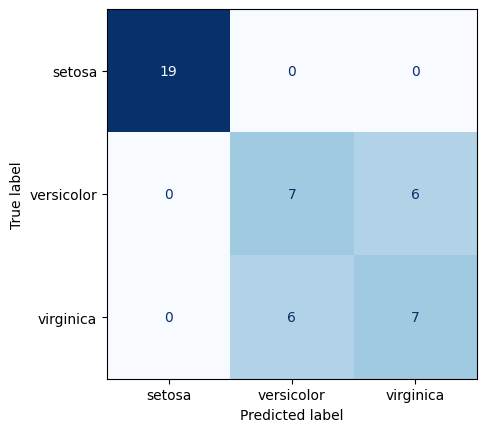

In [8]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=0.7, C=1)
train_plot_confusion(model, "SVM (RBF Kernel)", X_train, y_train, X_test, y_test)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 2 2 0 1 0 2 2 2 1 2 0 0 0 0 2 0 0 2 2
 0 0 0 1 2 2 0 0]

Confusion Matrix for KNN (k=5):


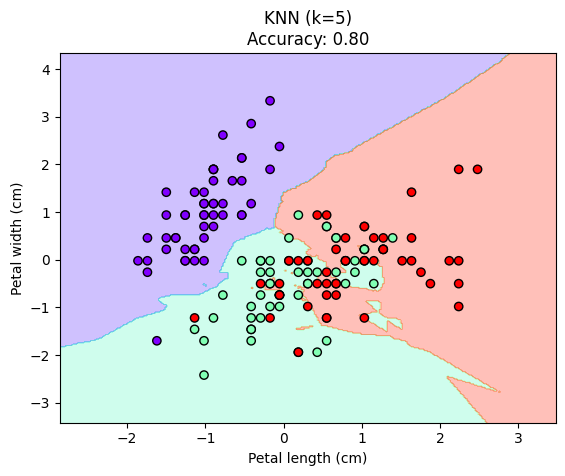

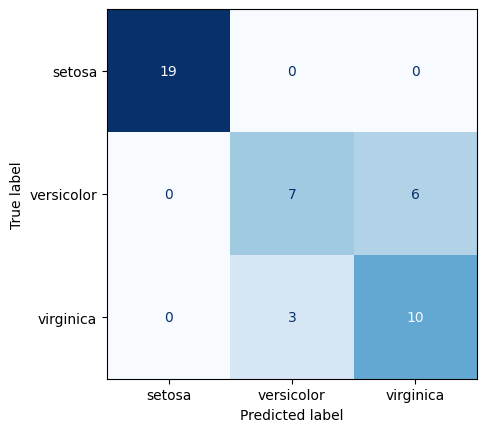

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
train_plot_confusion(model, "KNN (k=5)", X_train, y_train, X_test, y_test)
